# rbasics

# Some tools we’ll meet

-   Facts & extensions from the reading
    -   Create vectors using `c()`, `:`, `seq()`, `rep()`.

    -   Select vector elements using the square brackets `[ ]` (have you
        done this before?).

    -   Program using

        -   `for` loop,
        -   `while` loop,
        -   `if` statements,

    -   Write an original `function` (where have you done this before?)

    -   Subsetting with `[` (especially for vectors & data frames)

    -   Subsetting with `$` (especially for data frames & lists)

    -   Subsetting with `[[` (especially for lists)

    -   `read.csv` for reading datasets

    -   `dplyr`

    -   `ggplot2`

    -   `ggPlotThemes`
-   [RStudio Cheat Sheet (on
    Canvas)](https://www.rstudio.com/wp-content/uploads/2016/05/base-r.pdf)
-   Nested loops (e.g., data frame indices)
-   Extracting elements from arbitrary objects (e.g. a regression model
    object)
-   Programming a simulation with & without loops

In [ ]:
rm(list = ls())
# no packages to load since we're talking about Base R!

------------------------------------------------------------------------

# Goals for today?

1.  in your adventures with R programming you’ll often encounter code
    written in base R, so we’ll meet some common syntax.

2.  introduce loops as an intuitive approach to iterative tasks

3.  meet the basic syntax to write your very own R functions

4.  program a simulation study to better understand a counter-intuitive
    concept

e.g., Confidence interval statements:

> “We are 95% confident that the average amount of carbon stored in each
> square kilometer of tropical forest is between 9,600 and 13,600 tons”

> 95% CI: 11,600 ± 2⋅1000 = (9,600, 13,600)

What’s wrong with saying “there’s a 95% chance that the average amount
of carbon stored in each square kilometer of tropical forest is between
9,600 and 13,600 tons” ??

------------------------------------------------------------------------

# Creating vectors

#### `c( )` is most common by far

In [ ]:
grade <- c(2, 5, NA, 5)
grade 

[1]  2  5 NA  5

[1] NA

[1] 4

#### Shortcut using `:` for numbers in sequence

In [ ]:
2:6

[1] 2 3 4 5 6

[1] 2 3 4 5 6

#### Sequences using `seq( )`

In [ ]:
seq(2, 5, by = 0.2)

 [1] 2.0 2.2 2.4 2.6 2.8 3.0 3.2 3.4 3.6 3.8 4.0 4.2 4.4 4.6 4.8 5.0

#### Repeating a sequence using `rep( )`

In [ ]:
rep(c("A", "B", "C"), times = 3)

[1] "A" "B" "C" "A" "B" "C" "A" "B" "C"

# Selecting vector elements with square brackets

In [ ]:
# create a vector
x <- c("A", "B", "C", 1, 2, 3)
x

[1] "A" "B" "C" "1" "2" "3"

#### Select only element 4

In [ ]:
x[4]

[1] "1"

#### Select elements 2 thru 4

In [ ]:
x[2:4]

[1] "B" "C" "1"

#### Select elements 1 and 5

In [ ]:
x[c(1, 5)]

[1] "A" "2"

## Excluding Vector Elements with square brackets

In [ ]:
# create a vector
x <- c("A", "B", "C", 1, 2, 3)
x

[1] "A" "B" "C" "1" "2" "3"

#### Select all elements except element 4

In [ ]:
x[-4]

[1] "A" "B" "C" "2" "3"

#### Select all elements except elements 1, 4, and 6

In [ ]:
x[-c(1, 4, 6)]

[1] "B" "C" "2"

------------------------------------------------------------------------

# Selecting Vector Elements that match a Condition

In [ ]:
# create a vector of numbers
y <- c(1, -1,  6, -2,  6,  5,  9,  1, 10, 10)
y

 [1]  1 -1  6 -2  6  5  9  1 10 10

#### Select elements equal to 10

In [ ]:
y[y == 10]

[1] 10 10

#### Select elements less than zero

In [ ]:
y[y < 0]

[1] -1 -2

#### Select elements in the set {1, 2, 5}

In [ ]:
y[y %in% c(1, 2, 5)]

[1] 1 5 1

------------------------------------------------------------------------

# Programming with `for` Loops

#### Basic `for` Loop Syntax:

    for (index in sequence) {  
      do something  
    } 

#### Here’s a `for` loop that will “do something” for each number from 1 to 4

In [ ]:
for (i in 1:4) {
  j <- i + 10     # add 10 to the "current" value of `i` in each step of the loop
  print(j)        # print the result of `j` for each step of the loop
}

[1] 11
[1] 12
[1] 13
[1] 14

#### This is often used to iterate over each value in a vector where x\[i\] refers to element `i` of the vector `x`

In [ ]:
byFives <- seq(10, 37, by = 5)   # vector counts by 5
byFives 

[1] 10 15 20 25 30 35

[1] 3.333333
[1] 5
[1] 6.666667
[1] 8.333333
[1] 10
[1] 11.66667

------------------------------------------------------------------------

# Programming with `while` Loops

#### Basic `while` Loop Syntax:

    while (true condition){
      do something
    }

#### Here’s a `while` loop that prints the index `i` while it is less than 5:

In [ ]:
i <- 1            # initialize our index variable

while (i < 5) {   # set the condition of the `while` loop
  print(i)        # print the value of `i` in each step of the loop
  i <- i + 1      # increment `i` for the next trip through the loop
}

[1] 1
[1] 2
[1] 3
[1] 4

------------------------------------------------------------------------

# Programming with functions (that you build yourself!)

#### Basic `function` Syntax:

    function_name <- function(arg1) {
      do something
      return(new_object)
    }

#### Here’s a function that takes one number as an argument and squares it:

In [ ]:
squared <- function(x) {       # the function will be called "squared" and takes one argument
  calculation <- x * x         # this shows what the function will do with the `x` argument
  return(calculation)          # this tells the function to display the result of `calculation`
}

# Nothing happens until you call the new `squared( )` function that you've created:
squared(3)

[1] 9

------------------------------------------------------------------------

# Programming with conditional flow (if-else)

#### Basic `if` Statement Syntax:

    if (condition) {
      do something
    } else {
      do something different
    }

In [ ]:
squared_better <- function(x) {       # the function will be called "squared" and takes one argument
  if (!is.numeric(x)) {
    print("error: This function requires a numeric argument")
  } else {
    calculation <- x * x         # this shows what the function will do with the `x` argument
    return(calculation)          # this tells the function to display the result of `calculation`
  }
}

squared_better("1")

[1] "error: This function requires a numeric argument"

In [ ]:
var <- 5           # some variable set to 5

if (var > 3) {     # if condition
  print('Yes')     # do this if condition is satisfied
} else {
  print('No')      # do this if condition is NOT satisfied
}

[1] "Yes"

These `if` statements work well with other programming tools:

-   Inside a loop you might test a condition with each iteration through
    the loop and provide alternate instructions depending on the
    outcome.  
-   As part of a `function` you might provide different instructions
    depending on the argument supplied.

#### Fine to link as many conditions as needed:

    if (condition){
      do something
    } else if (another condition) {
      do something else
    } else {
      do something different
    }

------------------------------------------------------------------------

# Data Frame operations

#### A special case of a list where all elements are the same length.

In [ ]:
letters <- c("A", "B", "C", "D", "E", "F")    # create a vector
numbers <- 1:6                                # create another vector

df <- data.frame(numbers, letters)            # combine them as a data frame
df

  numbers letters
1       1       A
2       2       B
3       3       C
4       4       D
5       5       E
6       6       F

You can use square brackets to select specific elements based on \[row,
column\]…

#### Select element in row 3 and column 2

In [ ]:
df[3, 2]

[1] "C"

#### Select all elements in row 4 (note comma placement)

In [ ]:
df[4, ]

  numbers letters
4       4       D

#### Select all elements in column 2 (note comma placement again)

In [ ]:
df[ , 2]

[1] "A" "B" "C" "D" "E" "F"

------------------------------------------------------------------------

# Nested looping (e.g., over rows and columns)

In [ ]:
df2 <- data.frame(NULL)  # we need a placeholder, and it should be a data.frame 
Rows <- c(1:6)
Cols <- c(1:5)


for (j in 1:length(Cols)) {           # outer loop processed after each complete cycle of inner loop
  for (i in 1:length(Rows)) {         # inner loop processed most frequently
    df2[i, j] <- paste("Row", i, ", Col", j)  
  }
}

df2

             V1            V2            V3            V4            V5
1 Row 1 , Col 1 Row 1 , Col 2 Row 1 , Col 3 Row 1 , Col 4 Row 1 , Col 5
2 Row 2 , Col 1 Row 2 , Col 2 Row 2 , Col 3 Row 2 , Col 4 Row 2 , Col 5
3 Row 3 , Col 1 Row 3 , Col 2 Row 3 , Col 3 Row 3 , Col 4 Row 3 , Col 5
4 Row 4 , Col 1 Row 4 , Col 2 Row 4 , Col 3 Row 4 , Col 4 Row 4 , Col 5
5 Row 5 , Col 1 Row 5 , Col 2 Row 5 , Col 3 Row 5 , Col 4 Row 5 , Col 5
6 Row 6 , Col 1 Row 6 , Col 2 Row 6 , Col 3 Row 6 , Col 4 Row 6 , Col 5

------------------------------------------------------------------------

# The dollar sign `$` operator for data frames

In [ ]:
df <- data.frame(numbers, letters)    # same data frame used before
df

  numbers letters
1       1       A
2       2       B
3       3       C
4       4       D
5       5       E
6       6       F

#### Dollar sign `$` used to select a variable in a data frame by name (and simplify class)

In [ ]:
df$numbers

[1] 1 2 3 4 5 6

#### Dollar sign `$` used to add a variable in a data frame by name

In [ ]:
df$combo <- paste(letters, "-", numbers, "combo")   # paste is a handy function too

df$trueFalse <- c(T, F, T, T, F, F)
df

  numbers letters       combo trueFalse
1       1       A A - 1 combo      TRUE
2       2       B B - 2 combo     FALSE
3       3       C C - 3 combo      TRUE
4       4       D D - 4 combo      TRUE
5       5       E E - 5 combo     FALSE
6       6       F F - 6 combo     FALSE

------------------------------------------------------------------------

# Dollar sign `$` operator for other objects

#### Consider a simple linear regression model (`mtcars` data set):

In [ ]:
# this is a model predicting miles per gallon from weight of the car
CarModel <- lm(mpg ~ wt, data = mtcars)

# same model, different syntax--harder to read, but $ helps auto-fill variable names
CarModel2 <- lm(mtcars$mpg ~ mtcars$wt)  

#### The `summary( )` command will provide a useful summary of the model information

In [ ]:
summary(CarModel)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,    Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10

#### The `CarModel` object includes lots more though, as we can see through an `str()` command

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

List of 12
 $ coefficients : Named num [1:2] 37.29 -5.34
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "wt"
 $ residuals    : Named num [1:32] -2.28 -0.92 -2.09 1.3 -0.2 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ effects      : Named num [1:32] -113.65 -29.116 -1.661 1.631 0.111 ...
  ..- attr(*, "names")= chr [1:32] "(Intercept)" "wt" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:32] 23.3 21.9 24.9 20.1 18.9 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:32, 1:2] -5.657 0.177 0.177 0.177 0.177 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.05
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 30
 $ xlevels      : Named list()
 $ call  

We can extract that information from `CarModel` using the dollar sign
`$` operator.

How about coefficient estimates:

In [ ]:
CarModel$coefficients

(Intercept)          wt 
  37.285126   -5.344472 

In [ ]:
# compare methods to select various elements...

# double square brackets
CarModel[["model"]]

                     mpg    wt
Mazda RX4           21.0 2.620
Mazda RX4 Wag       21.0 2.875
Datsun 710          22.8 2.320
Hornet 4 Drive      21.4 3.215
Hornet Sportabout   18.7 3.440
Valiant             18.1 3.460
Duster 360          14.3 3.570
Merc 240D           24.4 3.190
Merc 230            22.8 3.150
Merc 280            19.2 3.440
Merc 280C           17.8 3.440
Merc 450SE          16.4 4.070
Merc 450SL          17.3 3.730
Merc 450SLC         15.2 3.780
Cadillac Fleetwood  10.4 5.250
Lincoln Continental 10.4 5.424
Chrysler Imperial   14.7 5.345
Fiat 128            32.4 2.200
Honda Civic         30.4 1.615
Toyota Corolla      33.9 1.835
Toyota Corona       21.5 2.465
Dodge Challenger    15.5 3.520
AMC Javelin         15.2 3.435
Camaro Z28          13.3 3.840
Pontiac Firebird    19.2 3.845
Fiat X1-9           27.3 1.935
Porsche 914-2       26.0 2.140
Lotus Europa        30.4 1.513
Ford Pantera L      15.8 3.170
Ferrari Dino        19.7 2.770
Maserati Bora       15.0 3.570
Volvo 14

(Intercept)          wt 
  37.285126   -5.344472 

                     mpg    wt
Mazda RX4           21.0 2.620
Mazda RX4 Wag       21.0 2.875
Datsun 710          22.8 2.320
Hornet 4 Drive      21.4 3.215
Hornet Sportabout   18.7 3.440
Valiant             18.1 3.460
Duster 360          14.3 3.570
Merc 240D           24.4 3.190
Merc 230            22.8 3.150
Merc 280            19.2 3.440
Merc 280C           17.8 3.440
Merc 450SE          16.4 4.070
Merc 450SL          17.3 3.730
Merc 450SLC         15.2 3.780
Cadillac Fleetwood  10.4 5.250
Lincoln Continental 10.4 5.424
Chrysler Imperial   14.7 5.345
Fiat 128            32.4 2.200
Honda Civic         30.4 1.615
Toyota Corolla      33.9 1.835
Toyota Corona       21.5 2.465
Dodge Challenger    15.5 3.520
AMC Javelin         15.2 3.435
Camaro Z28          13.3 3.840
Pontiac Firebird    19.2 3.845
Fiat X1-9           27.3 1.935
Porsche 914-2       26.0 2.140
Lotus Europa        30.4 1.513
Ford Pantera L      15.8 3.170
Ferrari Dino        19.7 2.770
Maserati Bora       15.0 3.570
Volvo 14

(Intercept)          wt 
  37.285126   -5.344472 

$model
                     mpg    wt
Mazda RX4           21.0 2.620
Mazda RX4 Wag       21.0 2.875
Datsun 710          22.8 2.320
Hornet 4 Drive      21.4 3.215
Hornet Sportabout   18.7 3.440
Valiant             18.1 3.460
Duster 360          14.3 3.570
Merc 240D           24.4 3.190
Merc 230            22.8 3.150
Merc 280            19.2 3.440
Merc 280C           17.8 3.440
Merc 450SE          16.4 4.070
Merc 450SL          17.3 3.730
Merc 450SLC         15.2 3.780
Cadillac Fleetwood  10.4 5.250
Lincoln Continental 10.4 5.424
Chrysler Imperial   14.7 5.345
Fiat 128            32.4 2.200
Honda Civic         30.4 1.615
Toyota Corolla      33.9 1.835
Toyota Corona       21.5 2.465
Dodge Challenger    15.5 3.520
AMC Javelin         15.2 3.435
Camaro Z28          13.3 3.840
Pontiac Firebird    19.2 3.845
Fiat X1-9           27.3 1.935
Porsche 914-2       26.0 2.140
Lotus Europa        30.4 1.513
Ford Pantera L      15.8 3.170
Ferrari Dino        19.7 2.770
Maserati Bora       15.0 3.570
V

$coefficients
(Intercept)          wt 
  37.285126   -5.344472 

We often show residuals vs fitted values to evaluate a `CarModel` fit.
The `CarModel` object stores that information for your use, so you can
extract it with the `$` operator to easily retrieve it:

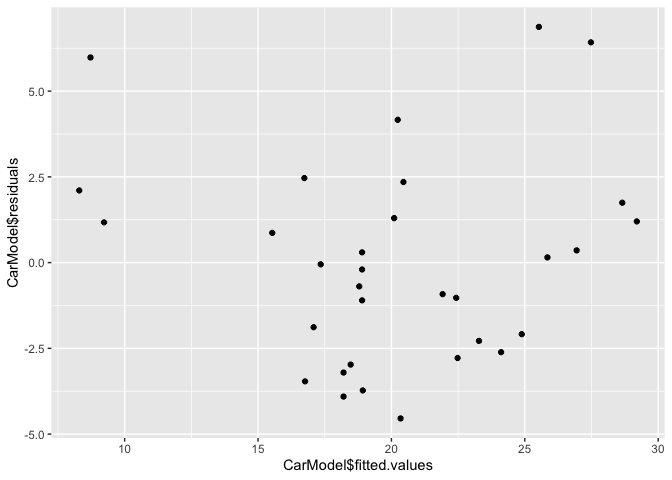

In [ ]:
library(tidyverse)

require(ggplot2)    # note--base r does plots too, but `ggplot2` gives you much more control

ggplot() + 
  geom_point(aes(x = CarModel$fitted.values, y = CarModel$residuals))

For the sake of illustration, suppose you want to color the residuals by
the number of cylinders as a proxy for engine size. (note it would
usually make more sense to include cylinder as a variable in the model,
but we’re just showing a way that you can pull information from
compatible data sets together on a plot)

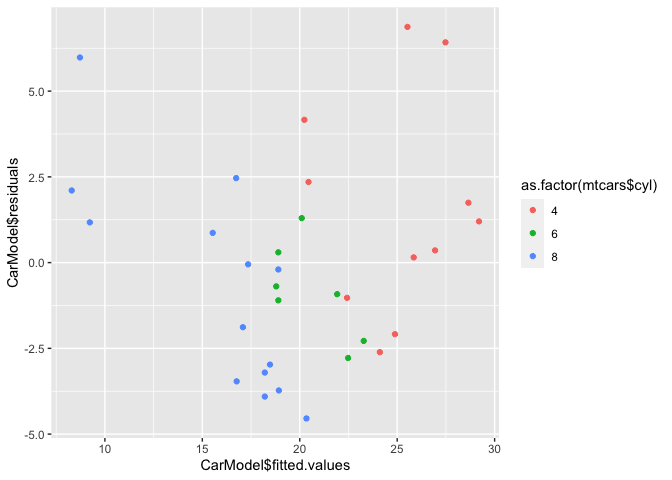

In [ ]:
require(ggplot2)

ggplot() + 
  geom_point(aes(x = CarModel$fitted.values, y = CarModel$residuals, color = as.factor(mtcars$cyl)))

------------------------------------------------------------------------

# Simulation

#### Result from a real study about carbon capture in tropical forests:

> 95% CI: 11,600 ± 2⋅1000 = (9,600, 13,600)

> “We are 95% confident that the average amount of carbon stored in each
> square kilometer of tropical forest is between 9,600 and 13,600 tons”

What’s wrong with saying “there’s a 95% chance that the average amount
of carbon stored in each square kilometer of tropical forest is between
9,600 and 13,600 tons” ??

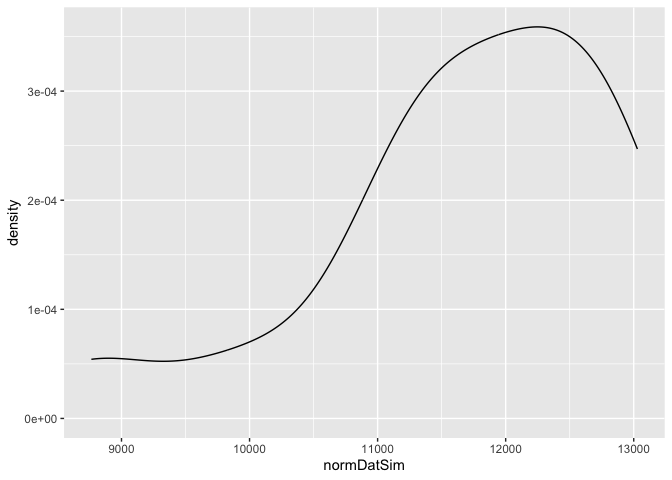


    One Sample t-test

data:  normDatSim
t = 38.94, df = 14, p-value = 1.128e-15
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 11050.26 12338.48
sample estimates:
mean of x 
 11694.37 

In [ ]:
normDatSim <- rnorm(n = 15, mean = 11600, sd = 1000)
# normDatSim <- rexp(n = 15, rate = 1/11600)  # a non-normal distribution for comparison

ggplot() +
  geom_density(aes(normDatSim))

------------------------------------------------------------------------

# Simulation with Loops

    simulationID    lower    upper captureMu
1              1 10951.64 12063.92      TRUE
2              2 11381.52 12364.64      TRUE
3              3 10757.10 11362.62     FALSE
4              4 11106.01 12054.23      TRUE
5              5 10856.05 12069.66      TRUE
6              6 11056.91 11856.22      TRUE
7              7 11120.45 12281.06      TRUE
8              8 11274.73 12109.13      TRUE
9              9 11105.12 11718.78      TRUE
10            10 11613.59 12933.86     FALSE
11            11 10943.30 12237.77      TRUE
12            12 10912.16 12335.99      TRUE
13            13 10858.53 11864.63      TRUE
14            14 10864.67 12137.97      TRUE
15            15 11044.00 12004.98      TRUE
16            16 10724.82 11863.10      TRUE
17            17 10480.79 11564.20     FALSE
18            18 10980.51 11863.02      TRUE
19            19 10878.12 12078.88      TRUE
20            20 10993.17 11990.60      TRUE
21            21 11399.96 12319.79      TRUE
22        

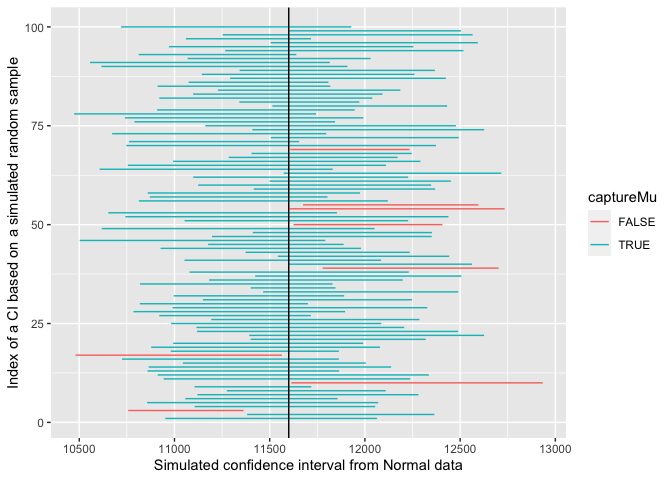

[1] 0.92

In [ ]:
# simulation settings
nsimulations <- 100
mu <- 11600
sigma <- 1000
sampleSize <- 15

# initialize a data frame where we can store various results at each step in our simulation
ConfIntDat <- data.frame(simulationID = rep(NA, nsimulations), 
                         lower = rep(NA, nsimulations), 
                         upper = rep(NA, nsimulations), 
                         captureMu = rep(NA, nsimulations))

# use a loop to simulate many results and store them at each step
for (i in 1:nsimulations) {                                   # increment 'i' from 1 to 'nsimulations'
  normDatSim <- rnorm(n = sampleSize, mean = mu, sd = sigma)  # simulate a new random sample
  ConfIntDat$simulationID[i] <- i                             # store an ID for each sample
  ConfIntDat$lower[i] <- t.test(normDatSim)$conf.int[1]       # store the lower bound of our CI
  ConfIntDat$upper[i] <- t.test(normDatSim)$conf.int[2]       # store upper bound of our CI
  ConfIntDat$captureMu[i] <- (mu > ConfIntDat$lower[i] & mu < ConfIntDat$upper[i])

}

ConfIntDat

-   Can you see why we call it a “95% confidence interval”?
-   Tinker with the simulation settings and try again
    -   Explore changes to `nsimulations`, `mu`, `sigma`, and
        `sampleSize`
    -   Try changing one at a time to larger or smaller values and
        observe what happens

------------------------------------------------------------------------

# another way… (some would say “The R Way”)

-   we can make a function that handles the guts of the loop and then
    call the function as an argument
-   then we can leverage more efficient tools to do things way faster
    (vectorized functions, parallel processing, etc)

### Here’s the original code…

    # simulation settings
    nsimulations <- 100
    mu <- 34
    sigma <- 5
    sampleSize <- 15

    # initialize a data frame where we can store various results at each step in our simulation
    ConfIntDat <- data.frame(simulationID = rep(NA, nsimulations), 
                             lower = rep(NA, nsimulations), 
                             upper = rep(NA, nsimulations), 
                             captureMu = rep(NA, nsimulations))

    # use a loop to simulate many results and store them at each step
    for (i in 1:nsimulations) {                                   # increment 'i' from 1 to 'nsimulations'
      normDatSim <- rnorm(n = sampleSize, mean = mu, sd = sigma)  # simulate a new random sample
      ConfIntDat$simulationID[i] <- i                             # store an ID for each sample
      ConfIntDat$lower[i] <- t.test(normDatSim)$conf.int[1]       # store the lower bound of our CI
      ConfIntDat$upper[i] <- t.test(normDatSim)$conf.int[2]       # store upper bound of our CI
      ConfIntDat$captureMu[i] <- (mu > ConfIntDat$lower[i] & mu < ConfIntDat$upper[i])

    }

### making a function…

-   the simulation settings will be arguments we (or another user) might
    want to change
-   when in doubt, it’s better to program arguments rather than “hard
    code” specific values within the guts of the function

In [ ]:
ciSim <- function(mu, sigma, sampleSize) {
  ## Purpose: function simulates random Normal data and constructs a 95% CI
  ## Arguments: 
  ##    mu: population mean for Normal distribution from which samples are drawn
  ##    sigma: population standard deviation for Normal distribution from which samples are drawn
  ##    sampleSize: sample size to draw from Normal distribution
  
  result <- list(NULL)
  normDatSim <- rnorm(n = sampleSize, mean = mu, sd = sigma)  # simulate a new random sample
  result[1] <- t.test(normDatSim)$conf.int[1]                 # store lower bound of CI
  result[2] <- t.test(normDatSim)$conf.int[2]                 # store upper bound of CI
  result[3] <- (mu > result[1] & mu < result[2])              # store mu capture result
  return(result)                                              # return our results
}

ciSim(mu = 34, sigma = 5, sampleSize = 15)

[[1]]
[1] 30.11012

[[2]]
[1] 35.50061

[[3]]
[1] TRUE

### let’s use mosaic::do() which can “do” something many times without writing a loop

In [ ]:
library(mosaic)

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'

The following object is masked from 'package:Matrix':

    mean

The following objects are masked from 'package:dplyr':

    count, do, tally

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    stat

The following objects are masked from 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var

The following objects are masked from 'package:base':

    max, mean, min, prod, range, sample, sum

          V1       V2    V3
1   31.68949 35.35167  TRUE
2   32.13623 39.10774  TRUE
3   31.69977 36.16027  TRUE
4   31.83453 37.01544  TRUE
5   29.19381 36.58244  TRUE
6   30.73296 37.28102  TRUE
7   34.22511 38.08191 FALSE
8   29.46991 36.03697  TRUE
9   31.12204 37.81801  TRUE
10  33.02033 37.31291  TRUE
11  32.26843 38.14532  TRUE
12  32.66223 38.90659  TRUE
13  29.58595 35.63642  TRUE
14  30.84798  35.4195  TRUE
15  30.70913 38.50565  TRUE
16  30.40315 36.32444  TRUE
17  30.51912 37.79584  TRUE
18   32.3349 37.26446  TRUE
19  27.89559 32.75271 FALSE
20  30.64411 35.09954  TRUE
21  29.78682 37.01726  TRUE
22   30.6656 36.03401  TRUE
23   32.9221 38.71433  TRUE
24  31.05348 37.17227  TRUE
25  32.62319 37.95872  TRUE
26   32.3005 39.35412  TRUE
27  29.61302 36.75143  TRUE
28  30.00273 37.47262  TRUE
29  31.30537 37.02367  TRUE
30  30.86041 36.83134  TRUE
31  32.17608 36.47328  TRUE
32  30.37568 36.37338  TRUE
33  30.72883 37.44587  TRUE
34  28.28396 33.71298 FALSE
35  30.40876  34.999

    rowname    lower    upper muCapture
1         1 31.68949 35.35167      TRUE
2         2 32.13623 39.10774      TRUE
3         3 31.69977 36.16027      TRUE
4         4 31.83453 37.01544      TRUE
5         5 29.19381 36.58244      TRUE
6         6 30.73296 37.28102      TRUE
7         7 34.22511 38.08191     FALSE
8         8 29.46991 36.03697      TRUE
9         9 31.12204 37.81801      TRUE
10       10 33.02033 37.31291      TRUE
11       11 32.26843 38.14532      TRUE
12       12 32.66223 38.90659      TRUE
13       13 29.58595 35.63642      TRUE
14       14 30.84798 35.41950      TRUE
15       15 30.70913 38.50565      TRUE
16       16 30.40315 36.32444      TRUE
17       17 30.51912 37.79584      TRUE
18       18 32.33490 37.26446      TRUE
19       19 27.89559 32.75271     FALSE
20       20 30.64411 35.09954      TRUE
21       21 29.78682 37.01726      TRUE
22       22 30.66560 36.03401      TRUE
23       23 32.92210 38.71433      TRUE
24       24 31.05348 37.17227      TRUE


### plot it

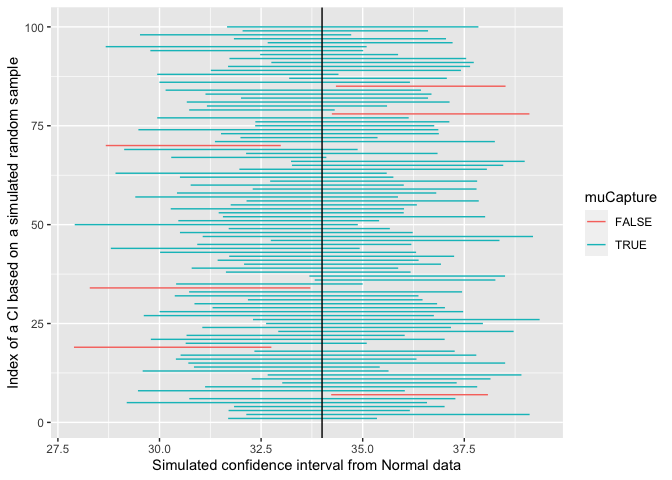

[1] 0.94

In [ ]:
sim_results_df %>%
  ggplot() +
  geom_segment(aes(    x = lower,    y = rowname, 
                    xend = upper, yend = rowname, 
                   color = muCapture)) + 
  geom_vline(aes(xintercept = 34)) +      # mu reference is hard coded here because mu wasn't returned by `ciSim()`
  xlab("Simulated confidence interval from Normal data") + 
  ylab("Index of a CI based on a simulated random sample")

# Second part

    -   `read.csv` for reading datasets

    -   `dplyr`

    -   `ggplot2`

    -   `ggPlotThemes`

# csv

Consider this `csv` file:

    Name, Age, Height
    Alice, 21, 5.5
    Bob, 25, 6.2
    Charlie, 35, 5.9

You can hard-code this into `R` as follows:

In [ ]:
library(knitr)
library(dplyr)

data_hard_code <- data.frame(
    Name = c("Alice", "Bob", "Charlie"),
    Age = c(21, 25, 35),
    Name = c(5.5, 6.2, 5.9)
)
data_hard_code %>% knitr::kable()

Let’s say we want to read the CSV file from memory, you can do this as
follows:

In [ ]:
Name <- c("Jon", "Bill", "Maria", "Ben", "Tina")
Age <- c(23, 41, 32, 58, 26)
df <- data.frame(Name, Age)
write.csv(df, "./data/data.csv", row.names=T)
file_location <- "./data/data.csv"
data_from_csv <- read.csv(file_location)
data_from_csv %>% knitr::kable()

There are slightly more advanced and efficient methods:

-   `read_csv` from Tidyverse
-   `data.table` package in R

Once you have a dataset, you can then begin your analyses:

------------------------------------------------------------------------

## Exploratory Data Analysis

This is where `dplyr` and `ggplot2` are super-useful, because they
facilitate **Exploratory Data Analysis**

Since you are already familiar with these packages, I will go through
them in ⚡️ speed.

You’ll hear this phrase thrown around very often:

> “We need to clean the dataset”
>
> — An anxious data scientist

The first thing I want to ask is: *what makes a dataset clean?*

Brainstorming:

1.  Get rid of `NULL` and `NA` and `NaN` and `missing` entries

2.  Making sure that all the values for a particular variable are of the
    same `data type`, e.g., `double`, or `character` or `logical`

3.  Every variable should have its own column

    -   A variable is something which holds “measurements”

4.  Every observation should have its own row

5.  Every cell, should have a unique value

This is what packages like `dplyr`, `tidyr` and their predecessor `plyr`
set out to achieve.

This is where functions like:

-   `pivot_wider()`
-   `pivot_longer()` from `tidyr` are useful.

#### `dplyr`

The objective of `dplyr` is to provide a set of *“verbs”* for
manipulating data.

Let’s take the following working example:

1.  Cars (mpg) dataset

In [ ]:
library(ggplot2)
head(mpg, 5) %>% knitr::kable()

1.  Iris (flower petal) dataset

In [ ]:
head(iris, 5) %>% knitr::kable()

Some examples are the following:

1.  Select: selects a subset of the columns

In [ ]:
mpg %>% 
select(c(model, displ, class))

# A tibble: 234 × 3
   model      displ class  
   <chr>      <dbl> <chr>  
 1 a4           1.8 compact
 2 a4           1.8 compact
 3 a4           2   compact
 4 a4           2   compact
 5 a4           2.8 compact
 6 a4           2.8 compact
 7 a4           3.1 compact
 8 a4 quattro   1.8 compact
 9 a4 quattro   1.8 compact
10 a4 quattro   2   compact
# ℹ 224 more rows

1.  We have `mutate` which creates new columns from existing ones

In [ ]:
iris %>% 
  mutate(Sepal.Area = Sepal.Length * Sepal.Width) %>% 
  head(., 10) %>% 
  knitr::kable()

1.  `filter`

In [ ]:
mpg %>% 
filter(class == "compact")

# A tibble: 47 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# ℹ 37 m

Some other verbs are:

-   `dplyr::summary()`, `dplyr::mutate()`
-   `tidyr::pivot_longer()`, `tidyr::pivot_wider()`
-   `left_join`, `right_join`, `inner_join`, `outer_join`

## `ggplot2`

`gg` in `ggplot2` stands for: **G**rammar of **G**raphics. There is NO
`ggplot1`

Since you guys are super familiar, let’s look at a super quick example:

We start off by decalring a `ggplot` object

In [ ]:
library(ggplot2)
plt <- ggplot(iris)

Now can add points to it

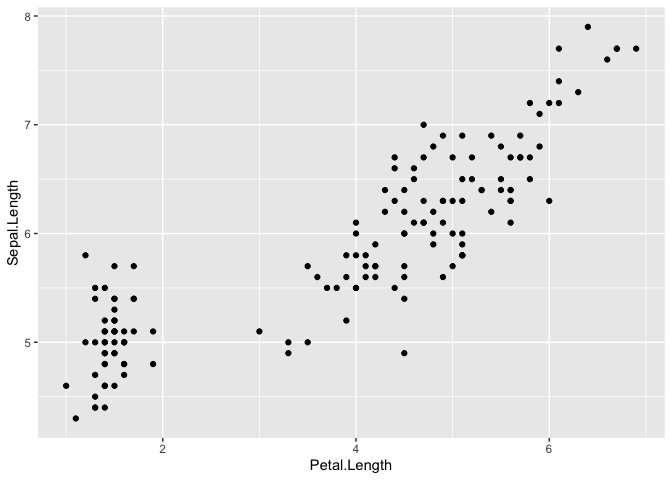

In [ ]:
plt + geom_point(
    aes(x=Petal.Length, y=Sepal.Length)
)

If we want to color the points by `Species`

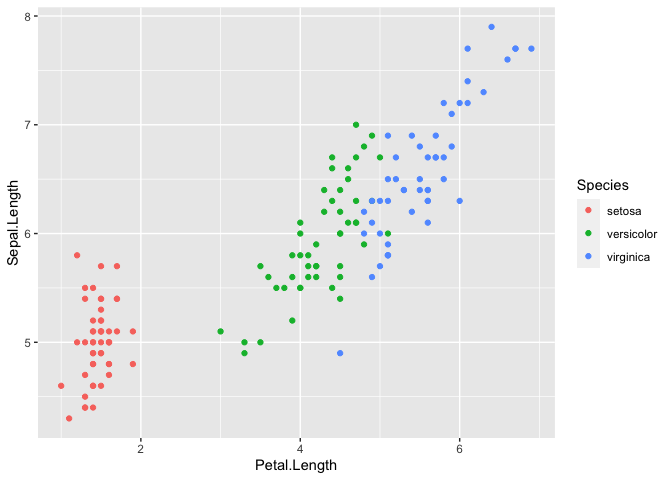

In [ ]:
plt + geom_point(
    aes(x=Petal.Length, y=Sepal.Length, colour=Species)
)

If we want to add trendlines to these points:

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

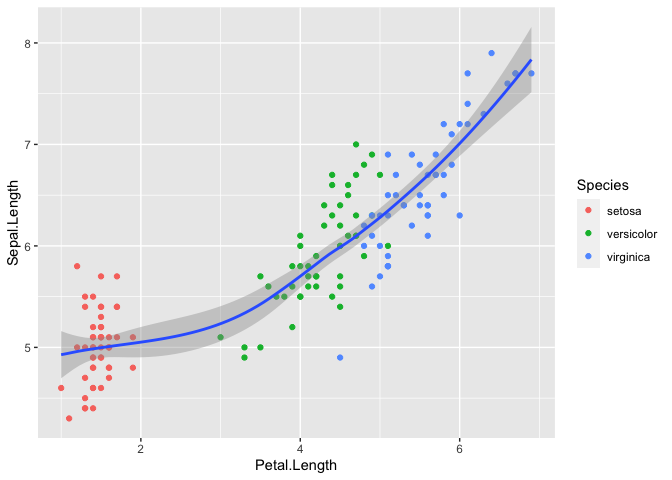

In [ ]:
plt + 
geom_point(
    aes(x=Petal.Length, y=Sepal.Length, colour=Species)
) +  
geom_smooth(
    aes(x=Petal.Length, y=Sepal.Length)
)

If we want a linear trendline then you can choose the method:

If we want to add trendlines to these points:

`geom_smooth()` using formula = 'y ~ x'

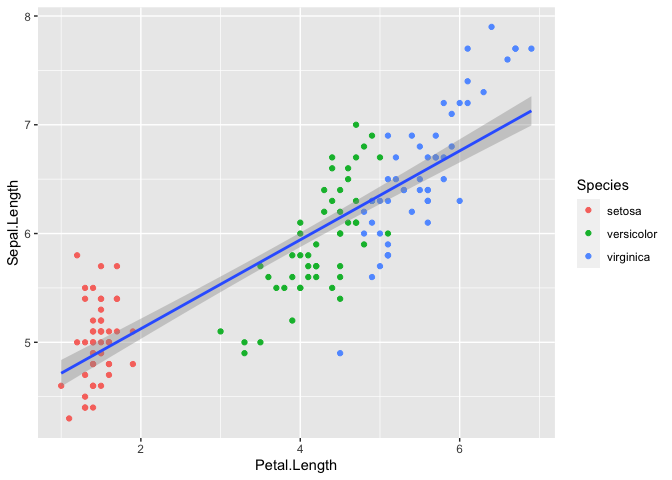

In [ ]:
plt + 
geom_point(
    aes(x=Petal.Length, y=Sepal.Length, colour=Species)
) +  
geom_smooth(
    aes(x=Petal.Length, y=Sepal.Length),
    method = lm
)

## `ggthemeassist`

Done in Rstudio

## More on **data types**

1.  String, e.g. this is a character
2.  Integer, e.g. `[1,2,3]`
3.  Double, e.g. `[2.2, 3.14159, 0.9]`
4.  Booleans, e.g. `TRUE/ FALSE`

-   What are factors? Factors are categorical variables.

Let’s look at an example:

`var` contains the country code for people in north america:

In [ ]:
var <- c(
    "USA",
    "USA",
    "CAN",
    "CAN",
    "CAN",
    "CAN",
    "MEX",
    "MEX"
)
var

[1] "USA" "USA" "CAN" "CAN" "CAN" "CAN" "MEX" "MEX"

To tell `R` that this is explicitly categorical and not just a vector of
strings, you have to specify the following:

In [ ]:
as.factor(var)

[1] USA USA CAN CAN CAN CAN MEX MEX
Levels: CAN MEX USA

Let’s look at another example

In [ ]:
head(iris, 3) %>% 
knitr::kable()

  [1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor ver

Similarly, if we look at `mpg`

In [ ]:
head(mpg, 3) %>% 
knitr::kable()

Let’s have a look at `class`

In [ ]:
as.factor(mpg$class)

  [1] compact    compact    compact    compact    compact    compact   
  [7] compact    compact    compact    compact    compact    compact   
 [13] compact    compact    compact    midsize    midsize    midsize   
 [19] suv        suv        suv        suv        suv        2seater   
 [25] 2seater    2seater    2seater    2seater    suv        suv       
 [31] suv        suv        midsize    midsize    midsize    midsize   
 [37] midsize    minivan    minivan    minivan    minivan    minivan   
 [43] minivan    minivan    minivan    minivan    minivan    minivan   
 [49] pickup     pickup     pickup     pickup     pickup     pickup    
 [55] pickup     pickup     pickup     suv        suv        suv       
 [61] suv        suv        suv        suv        pickup     pickup    
 [67] pickup     pickup     pickup     pickup     pickup     pickup    
 [73] pickup     pickup     suv        suv        suv        suv       
 [79] suv        suv        suv        suv        suv        pic

Similarly, we can have a look at the manufacturer:

In [ ]:
as.factor(mpg$manufacturer)

  [1] audi       audi       audi       audi       audi       audi      
  [7] audi       audi       audi       audi       audi       audi      
 [13] audi       audi       audi       audi       audi       audi      
 [19] chevrolet  chevrolet  chevrolet  chevrolet  chevrolet  chevrolet 
 [25] chevrolet  chevrolet  chevrolet  chevrolet  chevrolet  chevrolet 
 [31] chevrolet  chevrolet  chevrolet  chevrolet  chevrolet  chevrolet 
 [37] chevrolet  dodge      dodge      dodge      dodge      dodge     
 [43] dodge      dodge      dodge      dodge      dodge      dodge     
 [49] dodge      dodge      dodge      dodge      dodge      dodge     
 [55] dodge      dodge      dodge      dodge      dodge      dodge     
 [61] dodge      dodge      dodge      dodge      dodge      dodge     
 [67] dodge      dodge      dodge      dodge      dodge      dodge     
 [73] dodge      dodge      ford       ford       ford       ford      
 [79] ford       ford       ford       ford       ford       for

This is where the `forcats` package is really useful:

In [ ]:
library(forcats)
manufacturer <- as.factor(mpg$manufacturer)
fct_reorder(manufacturer, mpg$hwy, min)

  [1] audi       audi       audi       audi       audi       audi      
  [7] audi       audi       audi       audi       audi       audi      
 [13] audi       audi       audi       audi       audi       audi      
 [19] chevrolet  chevrolet  chevrolet  chevrolet  chevrolet  chevrolet 
 [25] chevrolet  chevrolet  chevrolet  chevrolet  chevrolet  chevrolet 
 [31] chevrolet  chevrolet  chevrolet  chevrolet  chevrolet  chevrolet 
 [37] chevrolet  dodge      dodge      dodge      dodge      dodge     
 [43] dodge      dodge      dodge      dodge      dodge      dodge     
 [49] dodge      dodge      dodge      dodge      dodge      dodge     
 [55] dodge      dodge      dodge      dodge      dodge      dodge     
 [61] dodge      dodge      dodge      dodge      dodge      dodge     
 [67] dodge      dodge      dodge      dodge      dodge      dodge     
 [73] dodge      dodge      ford       ford       ford       ford      
 [79] ford       ford       ford       ford       ford       for

We will be coming back to this in \~3 weeks when we dfo logistic
regression.

## `purrr`

This package provides a set of functional programming tools. It’s best
illustrated through an example:

Consider the following procedure: We want to

1.  Filter `iris` by species
2.  COmpute the `Sepal.Area` as `Sepal.Length` $\times$ `Sepal.Width`
3.  Find the average of `Sepal.Area` for every flower in the species

``` r
iris %>% 
mutate(Area = Sepal.Length * Sepal.Width) %>% 
group_by()
summarize()
```

Consider the following task:

1.  Take a number `i` from $1 \dots 10$
2.  Create a matrix with entries of dimension 1 … `i^2` $\times$ `i`
3.  Compute the average of the elements of the matrix
4.  Print it

One way of doing this is as follows:

In [ ]:
results <- c()
for (i in 1:10){
    M <- matrix(
        c(1:i*i), nrow=i
    )
    results[i] <- mean(M)
}
results

 [1]  1  3  6 10 15 21 28 36 45 55

A functional way to think about this is as follows:

$$i \rightarrow M_{i \times i} \rightarrow mean(M)$$

In [ ]:
library(purrr)
map(
    1:10,
    function(i){
        mean(
            matrix(
                c(1:i*i), nrow=i
            )
        )
    }
)

[[1]]
[1] 1

[[2]]
[1] 3

[[3]]
[1] 6

[[4]]
[1] 10

[[5]]
[1] 15

[[6]]
[1] 21

[[7]]
[1] 28

[[8]]
[1] 36

[[9]]
[1] 45

[[10]]
[1] 55